In [1]:
import pandas as pd

email_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Prioritization/test_cleaned_priority_email_dataset_machine_learning_model.csv')

In [2]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100025 entries, 0 to 100024
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Email ID         100000 non-null  object
 1   From             100025 non-null  object
 2   To               100025 non-null  object
 3   Date & Time      100025 non-null  object
 4   Subject          100025 non-null  object
 5   Message          100025 non-null  object
 6   Priority         100025 non-null  object
 7   Cleaned_Message  100025 non-null  object
 8   Cleaned_Subject  100025 non-null  object
dtypes: object(9)
memory usage: 6.9+ MB


In [2]:
email_data['Priority'].value_counts()

Priority
Medium    44600
Low       35051
High      30506
Name: count, dtype: int64

In [3]:
rows, cols = email_data.shape
#print(f"✅ Cleaned and combined CSV saved at:\n{output_file}")
print(f"🧮 Total rows: {rows}")
print(f"🧾 Total columns: {cols}")

🧮 Total rows: 110157
🧾 Total columns: 9


In [4]:
email_data['Combined_Text'] = email_data['Cleaned_Subject'].fillna('') + ' ' + email_data['Cleaned_Message'].fillna('')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    email_data['Combined_Text'],
    email_data['Priority'],
    test_size=0.2,
    random_state=42,
    stratify=email_data['Priority']
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 88125
Test set size: 22032


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")

Training features shape: (88125, 5000)
Test features shape: (22032, 5000)


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display label mapping
print("Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

Label Mapping:
0: High
1: Low
2: Medium


# SVM

✅ Column: Combined_Text
✅ Accuracy: 0.9992283950617284
📊 Classification Report (SVM):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      6101
         Low       1.00      1.00      1.00      7011
      Medium       1.00      1.00      1.00      8920

    accuracy                           1.00     22032
   macro avg       1.00      1.00      1.00     22032
weighted avg       1.00      1.00      1.00     22032



C:\Users\User\AppData\Local\Temp\ipykernel_20336\3604979279.py:32: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


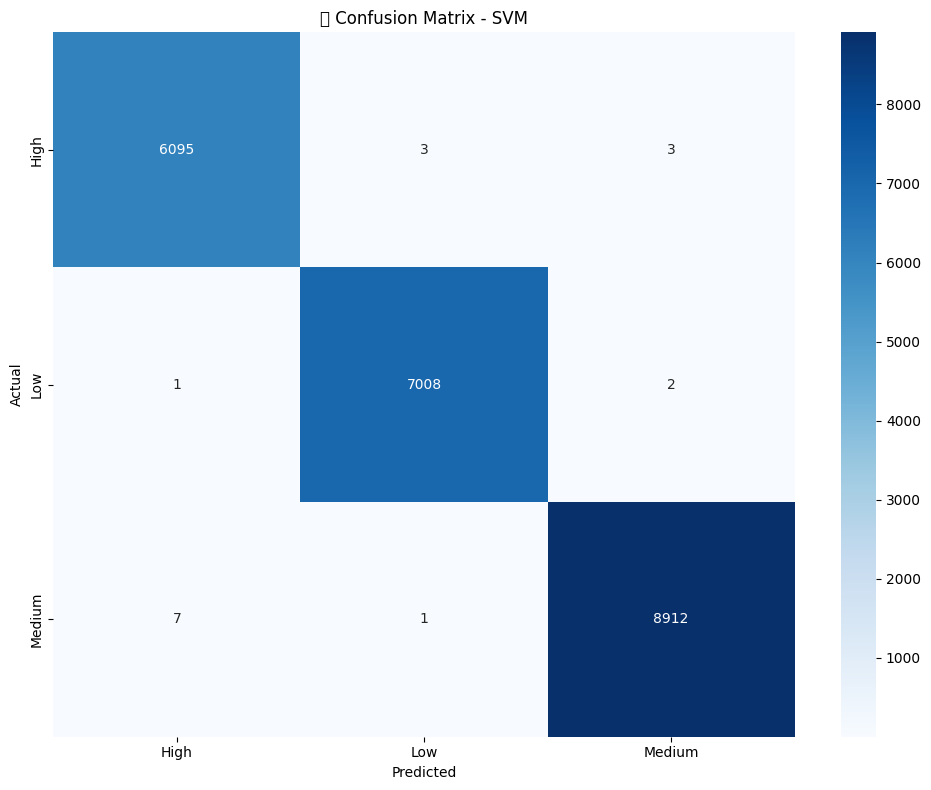

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Train SVM classifier using TF-IDF features and encoded labels
svm_model = LinearSVC(class_weight='balanced', max_iter=5000, dual=False)
svm_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict using test TF-IDF features
y_pred = svm_model.predict(X_test_tfidf)

# ✅ Evaluation
print("✅ Column: Combined_Text")
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (SVM):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("🧠 Confusion Matrix - SVM")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
import shap

# ✅ Create SHAP explainer for linear model
explainer = shap.LinearExplainer(svm_model, X_train_tfidf, feature_dependence="independent")

# ✅ Explain predictions on a few test examples
shap_values = explainer.shap_values(X_test_tfidf[:50])

# ✅ Visualize SHAP explanation for one test example
shap.initjs()
shap.force_plot(
    base_value=explainer.intercept_,
    shap_values=shap_values[0],
    features=X_test_tfidf[0],
    feature_names=[f'dim_{i}' for i in range(X_test_tfidf.shape[1])]
)



📊 Overfitting Check
✅ Train Accuracy: 0.9573563622366152
✅ Test Accuracy: 0.9315838800374883
📉 Overfit Gap: 0.025772482199126978


C:\Users\User\AppData\Local\Temp\ipykernel_3652\359454264.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Train Accuracy", "Test Accuracy"], y=[train_acc, test_acc], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_3652\359454264.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


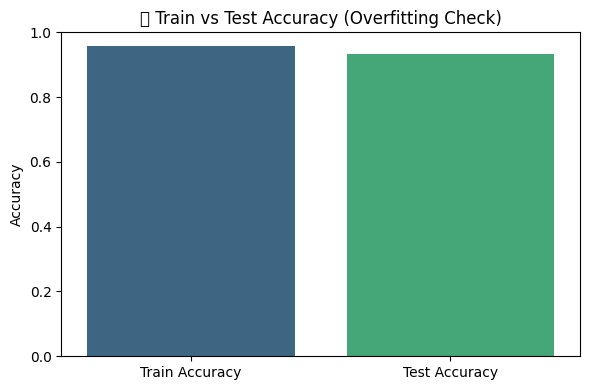

In [20]:
# === Overfitting Check ===
y_train_pred = svm_model.predict(X_train_tfidf)

train_acc = accuracy_score(y_train_encoded, y_train_pred)
test_acc = accuracy_score(y_test_encoded, y_pred)

print("\n📊 Overfitting Check")
print("✅ Train Accuracy:", train_acc)
print("✅ Test Accuracy:", test_acc)
print("📉 Overfit Gap:", train_acc - test_acc)

# Optional chart
plt.figure(figsize=(6, 4))
sns.barplot(x=["Train Accuracy", "Test Accuracy"], y=[train_acc, test_acc], palette="viridis")
plt.title("📊 Train vs Test Accuracy (Overfitting Check)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Linear Regression

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Column: Combined_Text
✅ Accuracy: 1.0
📊 Logistic Regression - Classification Report:
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Business

C:\Users\User\AppData\Local\Temp\ipykernel_17704\4158697880.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


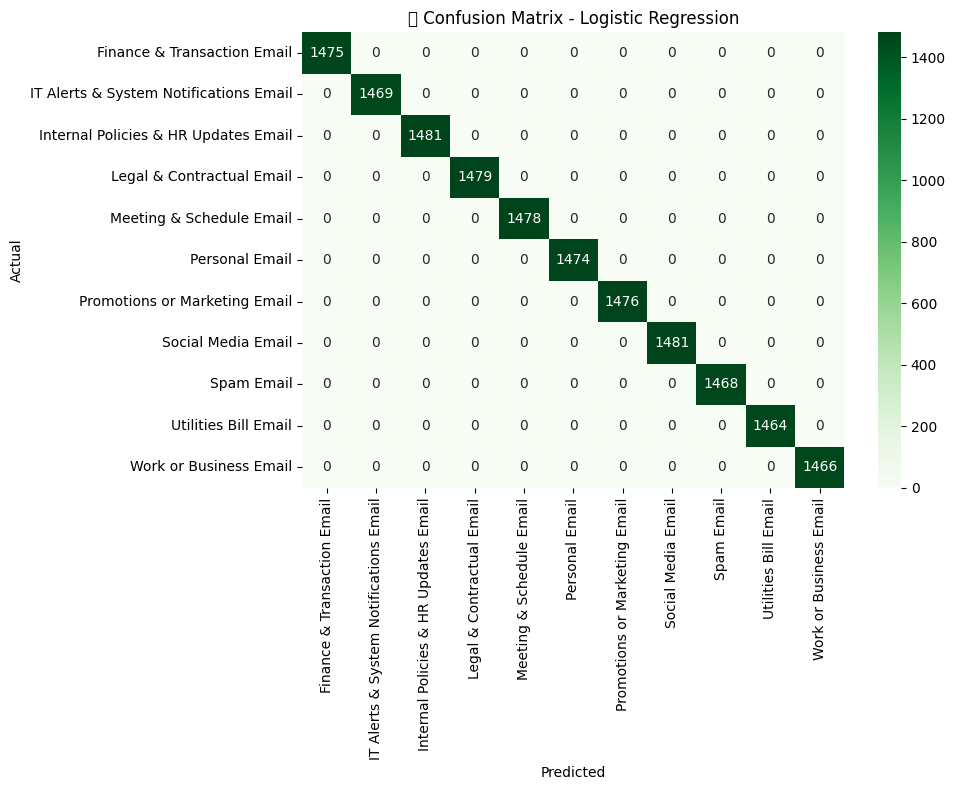

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Train logistic regression model
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=5000
)
lr_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict on test set
y_pred = lr_model.predict(X_test_tfidf)

# ✅ Evaluation
print("✅ Column: Combined_Text")
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Logistic Regression - Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("📊 Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Random Forest

✅ Column: Combined_Text
✅ Accuracy: 1.0
📊 Random Forest - Classification Report:
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Business Email

C:\Users\User\AppData\Local\Temp\ipykernel_17704\1546277691.py:36: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


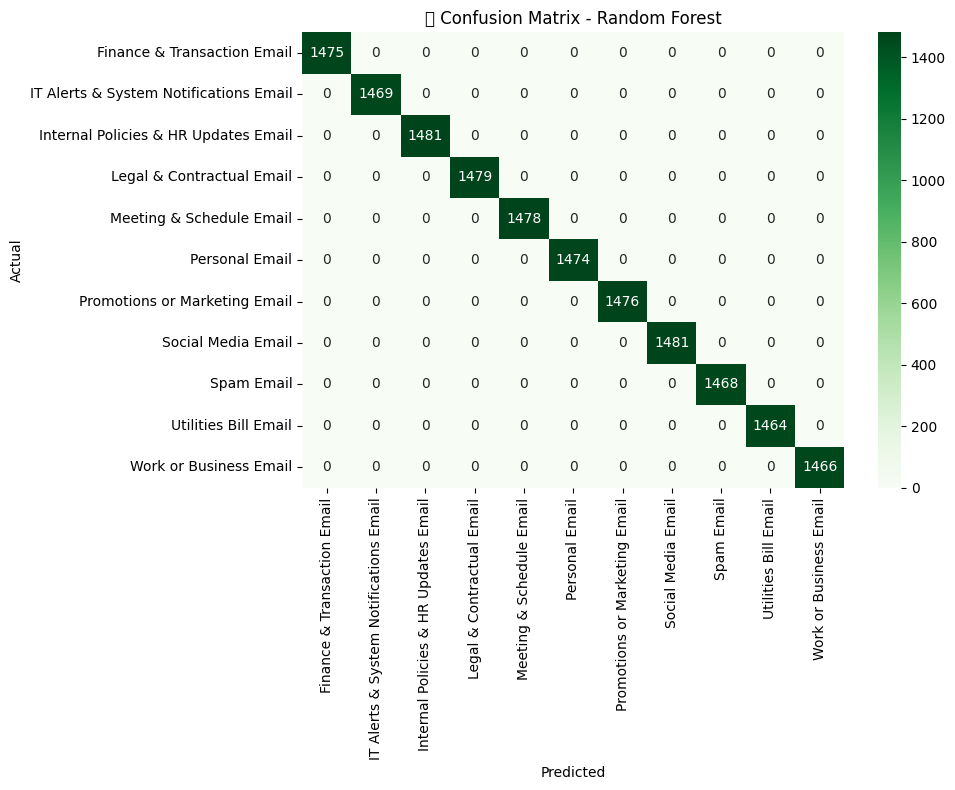

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Train the model using TF-IDF and encoded labels
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict
y_pred = rf_model.predict(X_test_tfidf)

# ✅ Evaluate
print("✅ Column: Combined_Text")
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Random Forest - Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("🌲 Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# XG Boost

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


✅ Column: Combined_Text
✅ Accuracy: 1.0
📊 XGBoost (GPU) - Classification Report:
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Business Email

C:\Users\User\AppData\Local\Temp\ipykernel_17704\2499451184.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


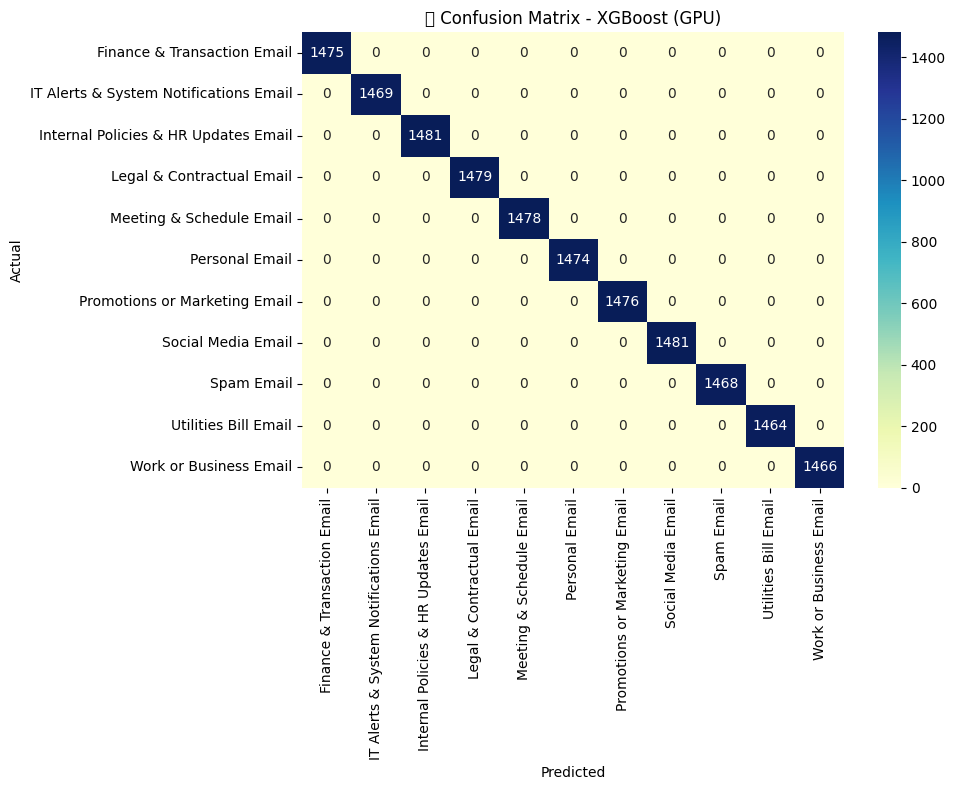

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Initialize the XGBoost model with GPU
xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='mlogloss',
    tree_method='hist',  # use 'gpu_hist' if you're sure GPU is supported
    device='cuda',
    random_state=42
)

# ✅ Fit the model using TF-IDF features and encoded labels
xgb_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict
y_pred = xgb_model.predict(X_test_tfidf)

# ✅ Evaluate
print("✅ Column: Combined_Text")
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 XGBoost (GPU) - Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("📊 Confusion Matrix - XGBoost (GPU)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Naive Bayes

✅ Column: Combined_Text
✅ Accuracy: 1.0
📊 Naive Bayes - Classification Report:
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Business Email  

C:\Users\User\AppData\Local\Temp\ipykernel_17704\3312395205.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


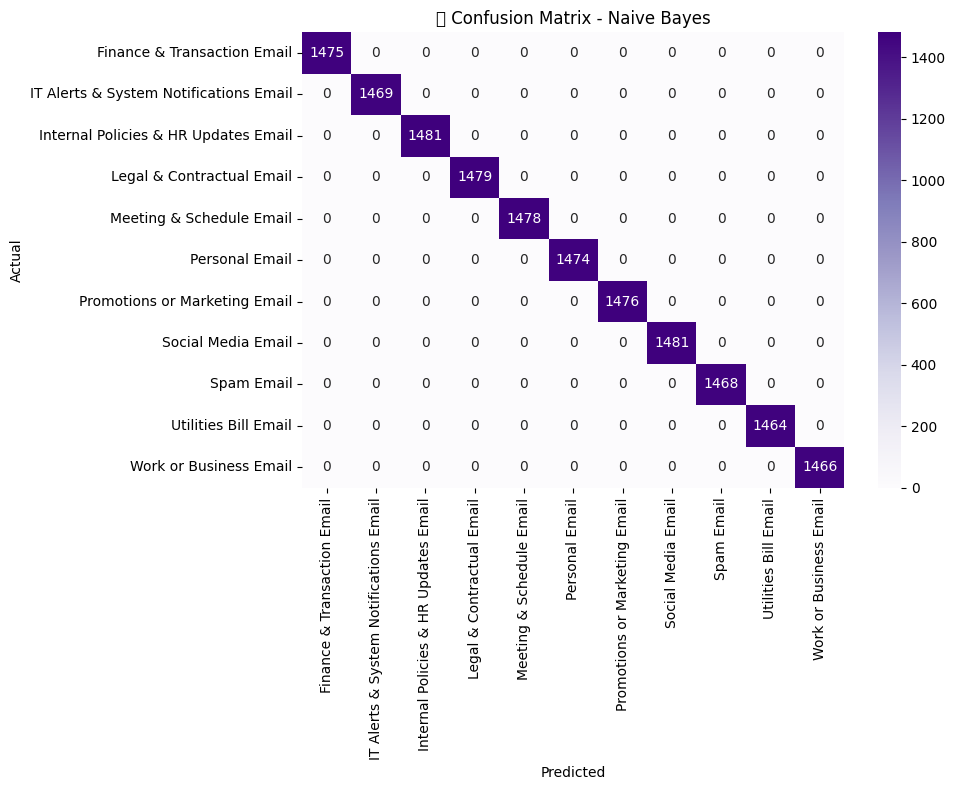

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Initialize Naive Bayes
nb_model = MultinomialNB()

# ✅ Train on TF-IDF features and encoded labels
nb_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict
y_pred = nb_model.predict(X_test_tfidf)

# ✅ Evaluate
print("✅ Column: Combined_Text")
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Naive Bayes - Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.title("📊 Confusion Matrix - Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Hybrid Model

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Column: Combined_Text
✅ Hybrid Accuracy: 1.0
📊 Hybrid VotingClassifier - Classification Report:
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work 

C:\Users\User\AppData\Local\Temp\ipykernel_17704\155047518.py:44: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


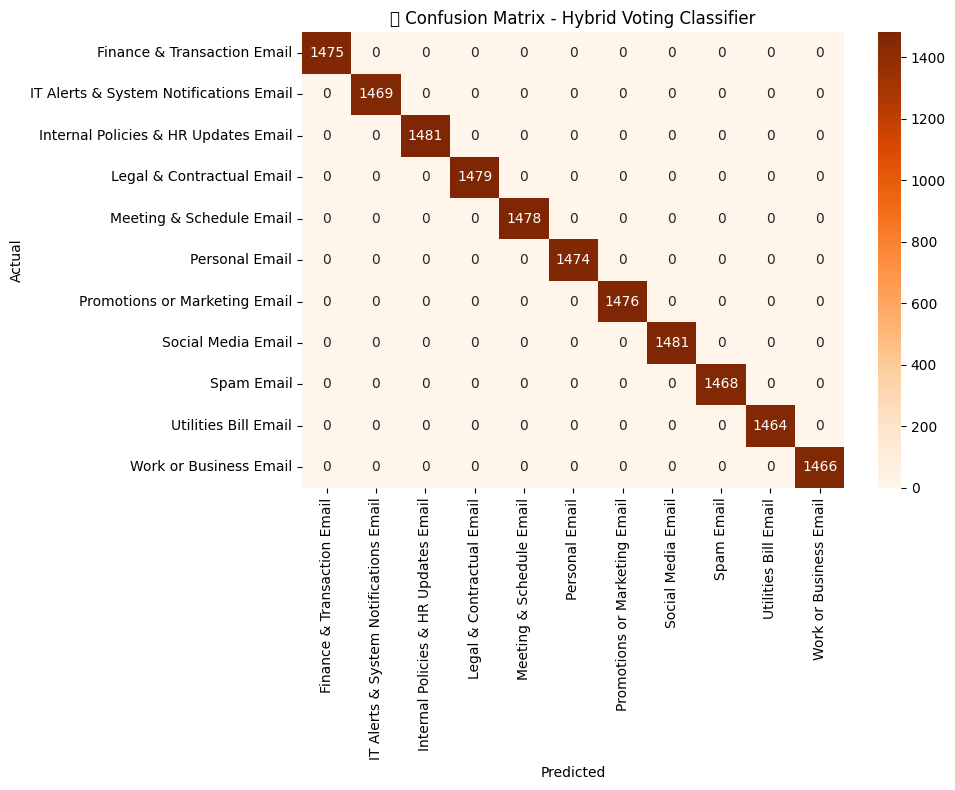

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# ✅ Create VotingClassifier (Hybrid)
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model),
        ('nb', nb_model)
    ],
    voting='hard'  # Use 'soft' if all models support predict_proba (LR + NB only)
)

# ✅ Train the hybrid model
voting_model.fit(X_train_tfidf, y_train_encoded)

# ✅ Predict
y_pred = voting_model.predict(X_test_tfidf)

# ✅ Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("✅ Column: Combined_Text")
print("✅ Hybrid Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Hybrid VotingClassifier - Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("🔀 Confusion Matrix - Hybrid Voting Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Model Comparison

In [15]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

models = {
    "Naive Bayes": nb_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "Logistic Regression": lr_model,
    "XGBoost": xgb_model,
    "Hybrid": voting_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)  # ✅ TF-IDF transformed
    acc = accuracy_score(y_test_encoded, y_pred)  # ✅ Encoded labels
    report = classification_report(y_test_encoded, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['macro avg']['precision'],
        "Recall": report['macro avg']['recall'],
        "F1-score": report['macro avg']['f1-score']
    })

# Compare results
comparison_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(comparison_df)

                 Model  Accuracy  Precision  Recall  F1-score
0          Naive Bayes       1.0        1.0     1.0       1.0
1        Random Forest       1.0        1.0     1.0       1.0
2                  SVM       1.0        1.0     1.0       1.0
3  Logistic Regression       1.0        1.0     1.0       1.0
4              XGBoost       1.0        1.0     1.0       1.0
5               Hybrid       1.0        1.0     1.0       1.0


C:\Users\User\AppData\Local\Temp\ipykernel_3652\4063191709.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


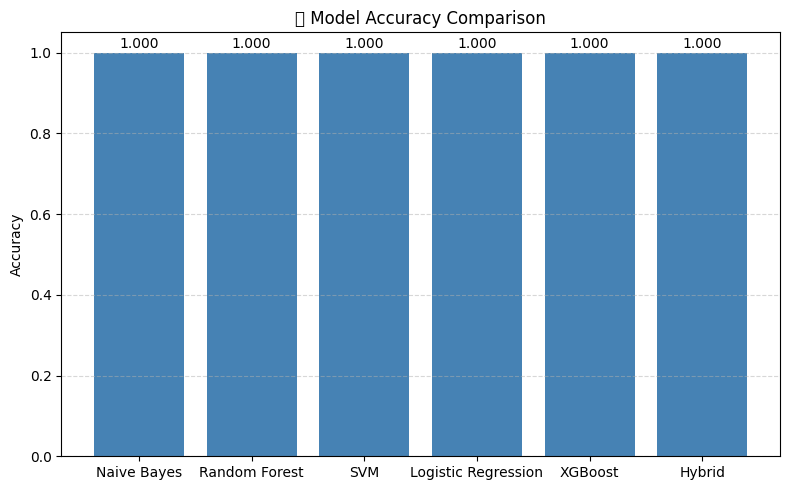

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='steelblue')

# Add accuracy labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', fontsize=10)

plt.title("🔍 Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17704\1884431849.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


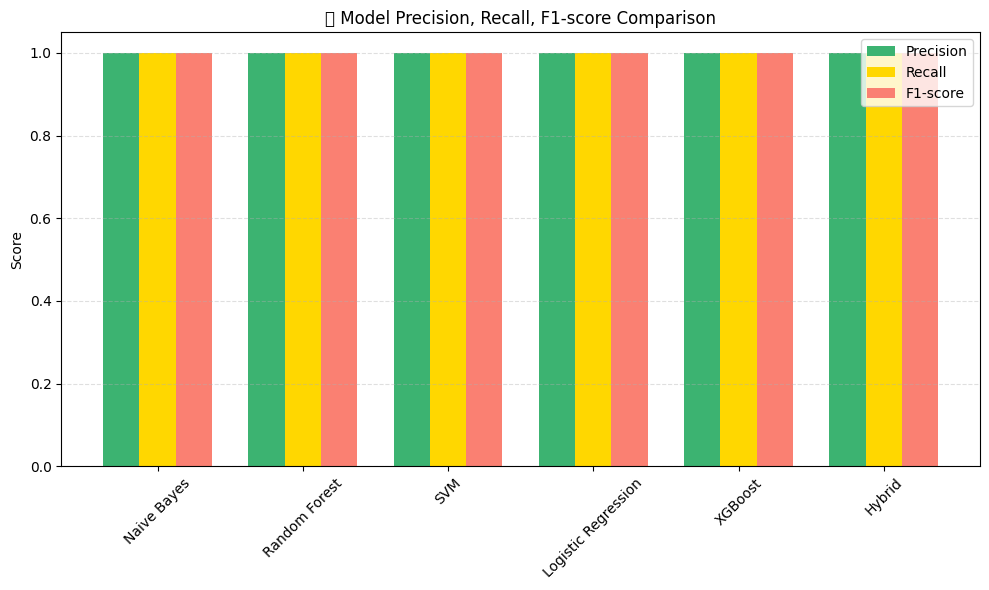

In [16]:
import numpy as np

metrics = ['Precision', 'Recall', 'F1-score']
x = np.arange(len(comparison_df))  # label locations
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

# Plot each metric
plt.bar(x - width, comparison_df['Precision'], width, label='Precision', color='mediumseagreen')
plt.bar(x, comparison_df['Recall'], width, label='Recall', color='gold')
plt.bar(x + width, comparison_df['F1-score'], width, label='F1-score', color='salmon')

# Labels and formatting
plt.ylabel('Score')
plt.title('📊 Model Precision, Recall, F1-score Comparison')
plt.xticks(x, comparison_df['Model'], rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Save Models

In [17]:
import joblib
import os

# Define your save path
save_dir = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result"

# Save TF-IDF vectorizer
joblib.dump(vectorizer, os.path.join(save_dir, "tfidf_vectorizer.joblib"))

# Save LabelEncoder
joblib.dump(label_encoder, os.path.join(save_dir, "label_encoder.joblib"))

# Save all models
joblib.dump(svm_model, os.path.join(save_dir, "svm_model.joblib"))
joblib.dump(lr_model, os.path.join(save_dir, "logistic_regression_model.joblib"))
joblib.dump(rf_model, os.path.join(save_dir, "random_forest_model.joblib"))
joblib.dump(xgb_model, os.path.join(save_dir, "xgboost_model.joblib"))
joblib.dump(nb_model, os.path.join(save_dir, "naive_bayes_model.joblib"))
joblib.dump(voting_model, os.path.join(save_dir, "hybrid_model.joblib"))

print("✅ All models and preprocessors saved successfully.")

✅ All models and preprocessors saved successfully.


# Test Data

✅ Accuracy: 0.44812554489973844

📊 Classification Report:

                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.56      0.32      0.41       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.02         1
                        Personal Email       0.01      0.20      0.02         5
         Promotions or Marketing Email       0.97      0.46      0.62      1282
                    Social Media Email       0.42      0.69      0.52       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.32      0.16      0.21       292

                             micro avg       0.48      0.45      0.47      2294
                             macro avg       0.25      0.32

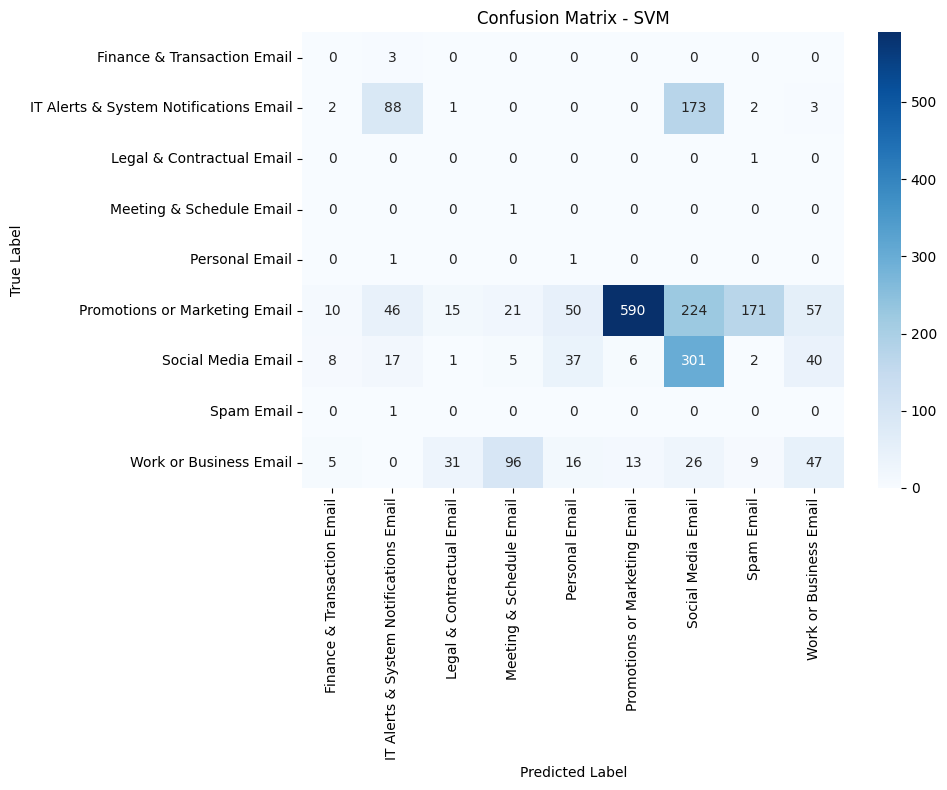

In [18]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/emails_202504202357.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load saved model components ===
model_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/svm_model.joblib"
vectorizer_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/tfidf_vectorizer.joblib"
encoder_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/label_encoder.joblib"

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)
label_encoder = joblib.load(encoder_path)

# === Step 3: Preprocess ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test = vectorizer.transform(df_test['Combined_Text'])

# === Step 4: Encode true labels if available
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 5: Predict
y_pred = model.predict(X_test)
df_test['Predicted_Label'] = y_pred
df_test['Predicted_Category'] = label_encoder.inverse_transform(y_pred)

# === Step 6: Evaluation (with fix for class mismatch)
if 'True_Category' in df_test.columns:
    print("✅ Accuracy:", accuracy_score(y_true, y_pred))

    # Get only classes that appear in y_true
    unique_classes = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_classes)

    print("\n📊 Classification Report:\n")
    print(classification_report(
        y_true, y_pred,
        labels=unique_classes,
        target_names=target_names
    ))

    # === Step 7: Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="Blues")
    plt.title("Confusion Matrix - SVM")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


🚀 Evaluating: SVM
✅ Accuracy: 0.8641
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.97      0.99      0.98       939
IT Alerts & System Notifications Email       0.68      0.84      0.75      1168
  Internal Policies & HR Updates Email       0.98      1.00      0.99       965
             Legal & Contractual Email       0.95      1.00      0.97       956
              Meeting & Schedule Email       0.88      1.00      0.94       929
                        Personal Email       0.90      1.00      0.95       951
         Promotions or Marketing Email       0.99      0.68      0.81      2171
                    Social Media Email       0.75      0.90      0.82      1397
                            Spam Email       0.81      1.00      0.89       790
                  Utilities Bill Email       0.71      0.49      0.58       785
                Work or Business Email       0.91      0.80      0.85      1248



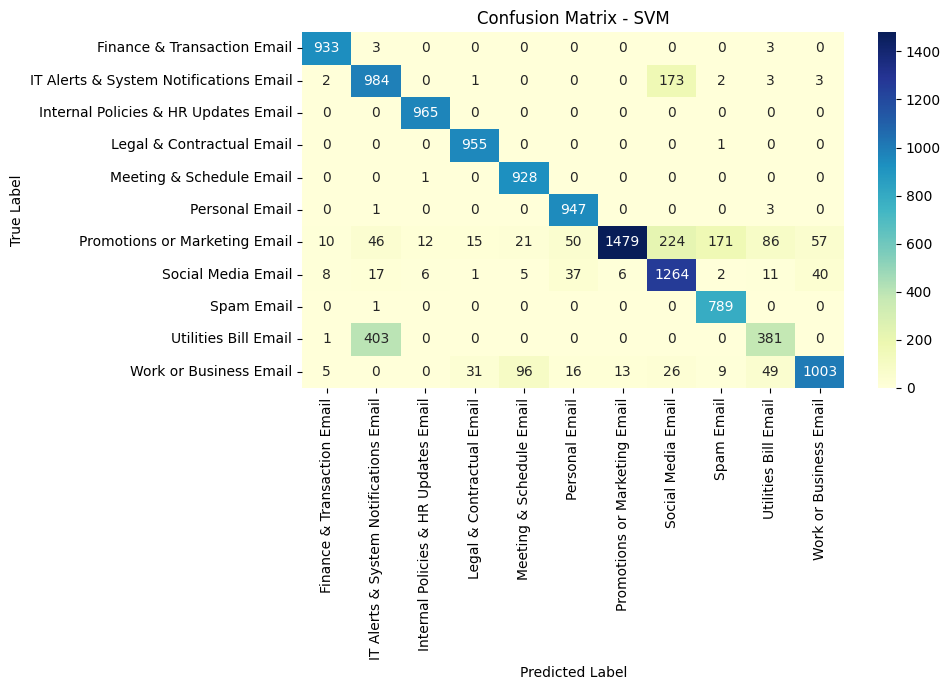


🚀 Evaluating: Logistic Regression
✅ Accuracy: 0.8673
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.97      0.99      0.98       939
IT Alerts & System Notifications Email       0.68      0.84      0.75      1168
  Internal Policies & HR Updates Email       0.99      1.00      0.99       965
             Legal & Contractual Email       0.95      1.00      0.97       956
              Meeting & Schedule Email       0.86      1.00      0.93       929
                        Personal Email       0.92      1.00      0.96       951
         Promotions or Marketing Email       0.99      0.70      0.82      2171
                    Social Media Email       0.74      0.90      0.82      1397
                            Spam Email       0.89      1.00      0.94       790
                  Utilities Bill Email       0.65      0.49      0.55       785
                Work or Business Email       0.91      0.80      

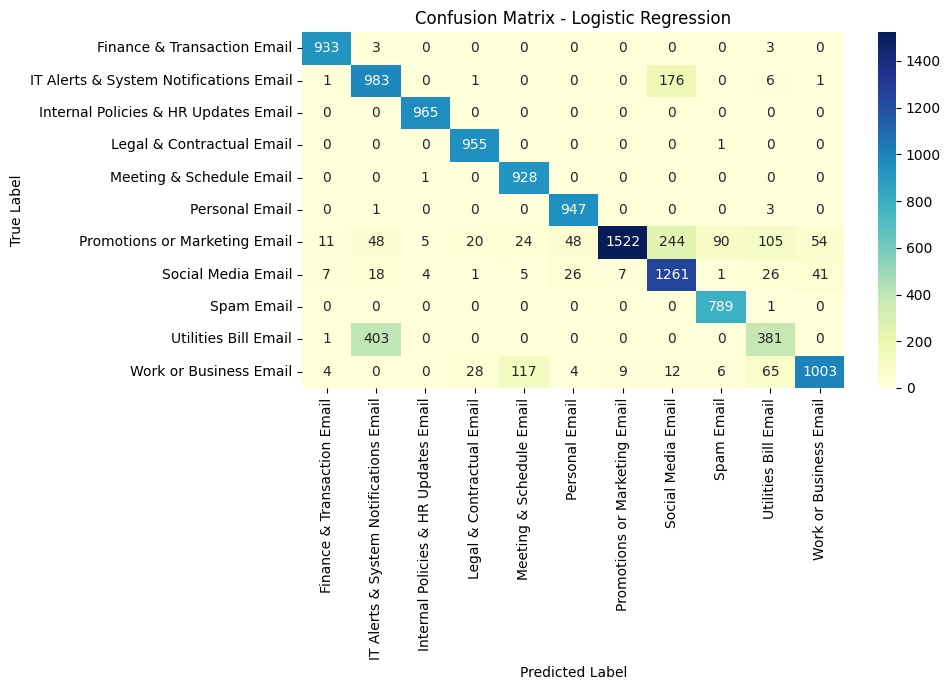


🚀 Evaluating: Random Forest
✅ Accuracy: 0.8135
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.97      0.99      0.98       939
IT Alerts & System Notifications Email       0.44      0.84      0.58      1168
  Internal Policies & HR Updates Email       0.99      1.00      1.00       965
             Legal & Contractual Email       0.99      1.00      0.99       956
              Meeting & Schedule Email       0.95      1.00      0.97       929
                        Personal Email       0.77      1.00      0.87       951
         Promotions or Marketing Email       1.00      0.49      0.66      2171
                    Social Media Email       0.70      0.79      0.74      1397
                            Spam Email       0.98      1.00      0.99       790
                  Utilities Bill Email       0.70      0.49      0.57       785
                Work or Business Email       0.98      0.77      0.86  

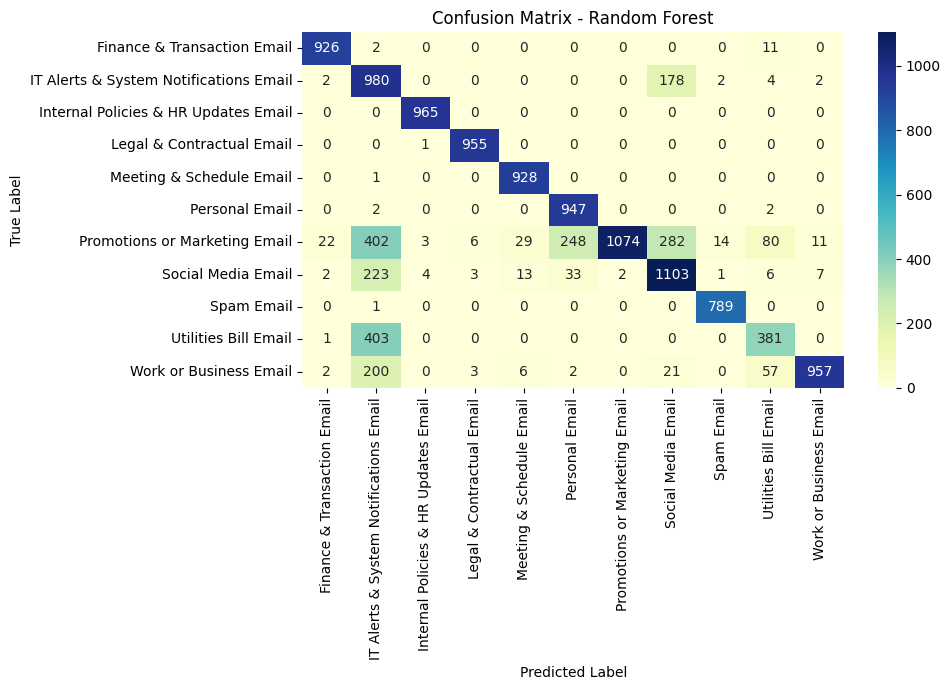


🚀 Evaluating: XGBoost
✅ Accuracy: 0.7283
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.99      0.86      0.92       939
IT Alerts & System Notifications Email       0.44      0.82      0.57      1168
  Internal Policies & HR Updates Email       0.99      1.00      0.99       965
             Legal & Contractual Email       0.49      1.00      0.66       956
              Meeting & Schedule Email       0.91      1.00      0.95       929
                        Personal Email       0.91      1.00      0.95       951
         Promotions or Marketing Email       0.96      0.08      0.16      2171
                    Social Media Email       0.59      0.79      0.67      1397
                            Spam Email       0.96      1.00      0.98       790
                  Utilities Bill Email       0.84      0.49      0.62       785
                Work or Business Email       0.98      0.77      0.86      12

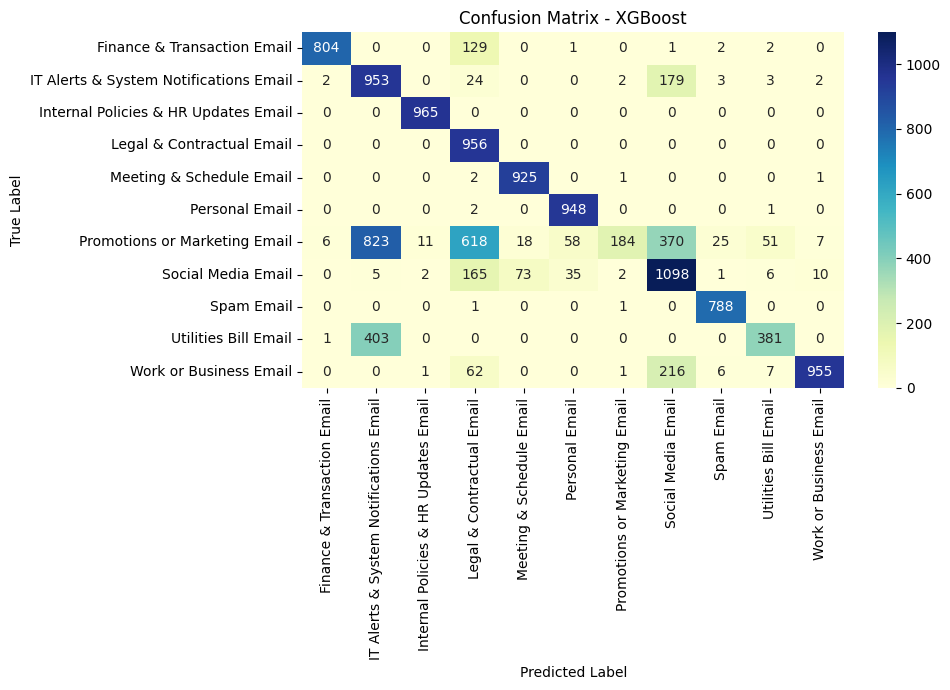


🚀 Evaluating: Naive Bayes
✅ Accuracy: 0.8959
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.93      0.99      0.96       939
IT Alerts & System Notifications Email       0.75      0.84      0.79      1168
  Internal Policies & HR Updates Email       0.97      1.00      0.99       965
             Legal & Contractual Email       0.95      1.00      0.97       956
              Meeting & Schedule Email       0.92      1.00      0.96       929
                        Personal Email       0.94      1.00      0.97       951
         Promotions or Marketing Email       0.98      0.78      0.87      2171
                    Social Media Email       0.81      0.86      0.84      1397
                            Spam Email       0.93      1.00      0.96       790
                  Utilities Bill Email       0.84      0.65      0.73       785
                Work or Business Email       0.85      0.89      0.87    

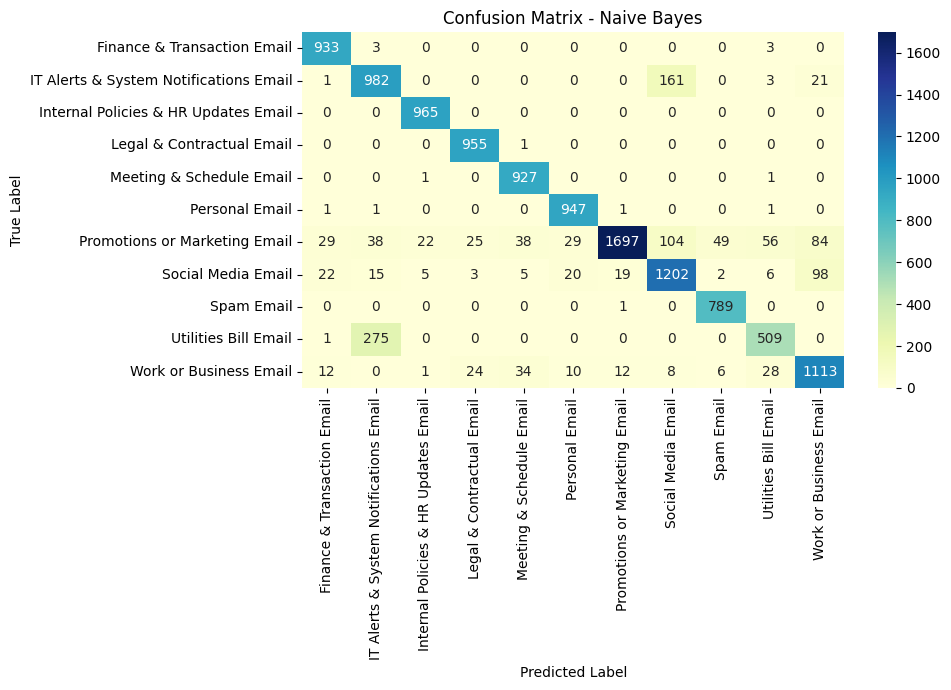


🚀 Evaluating: Hybrid
✅ Accuracy: 0.8702
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.96      0.99      0.98       939
IT Alerts & System Notifications Email       0.67      0.84      0.75      1168
  Internal Policies & HR Updates Email       0.98      1.00      0.99       965
             Legal & Contractual Email       0.95      1.00      0.97       956
              Meeting & Schedule Email       0.86      1.00      0.93       929
                        Personal Email       0.92      1.00      0.95       951
         Promotions or Marketing Email       0.99      0.71      0.83      2171
                    Social Media Email       0.76      0.91      0.82      1397
                            Spam Email       0.88      1.00      0.94       790
                  Utilities Bill Email       0.72      0.49      0.58       785
                Work or Business Email       0.92      0.80      0.86      124

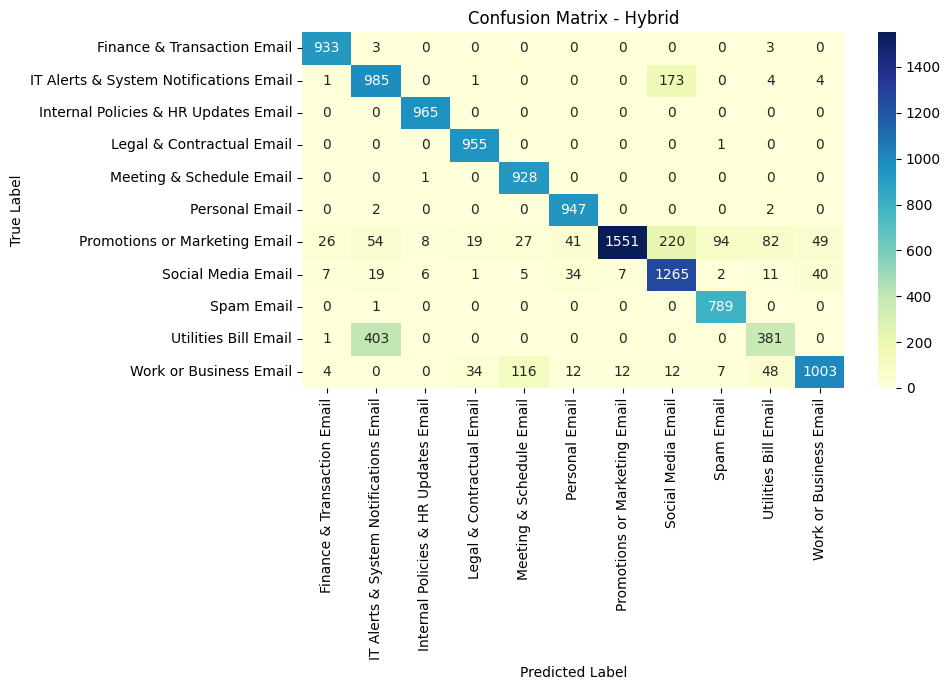


📊 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
4          Naive Bayes  0.895926   0.897905  0.909819  0.900901
5               Hybrid  0.870152   0.872859  0.885300  0.872206
1  Logistic Regression  0.867306   0.869124  0.883670  0.870374
0                  SVM  0.864135   0.866775  0.882142  0.866692
2        Random Forest  0.813481   0.860868  0.850366  0.837666
3              XGBoost  0.728271   0.822822  0.798496  0.756218


C:\Users\User\AppData\Local\Temp\ipykernel_17704\516883875.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_17704\516883875.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


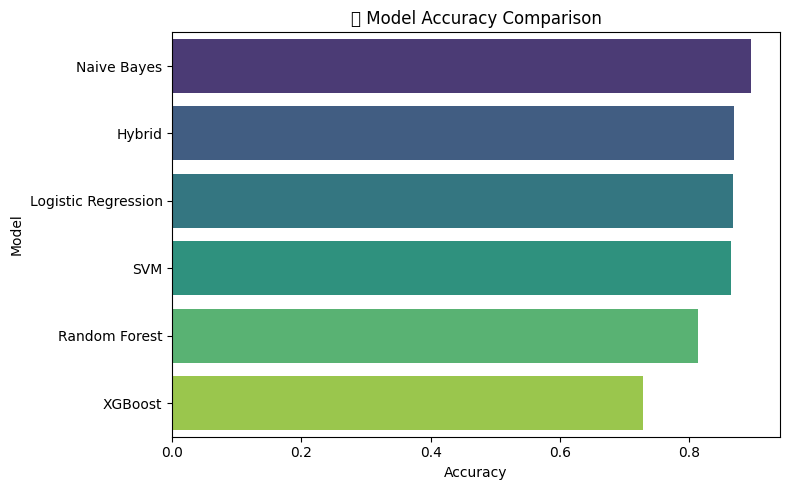

In [21]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/rewritten_batch1_emails_polished_testing_data.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load shared vectorizer and label encoder ===
vectorizer_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/tfidf_vectorizer.joblib"
encoder_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/label_encoder.joblib"

vectorizer = joblib.load(vectorizer_path)
label_encoder = joblib.load(encoder_path)

# === Step 3: Preprocess ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test = vectorizer.transform(df_test['Combined_Text'])

# Encode true labels if column exists
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 4: Define All Model Paths ===
model_paths = {
    "SVM": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/svm_model.joblib",
    "Logistic Regression": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/logistic_regression_model.joblib",
    "Random Forest": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/random_forest_model.joblib",
    "XGBoost": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/xgboost_model.joblib",
    "Naive Bayes": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/naive_bayes_model.joblib",
    "Hybrid": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/hybrid_model.joblib"
}

# === Step 5: Evaluate All Models ===
comparison_results = []

for model_name, model_path in model_paths.items():
    print(f"\n🚀 Evaluating: {model_name}")
    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    # ✅ Identify present classes in test set
    unique_labels = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_labels)

    # ✅ Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names, output_dict=True)

    # ✅ Append to summary
    comparison_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": report_dict["macro avg"]["precision"],
        "Recall": report_dict["macro avg"]["recall"],
        "F1-Score": report_dict["macro avg"]["f1-score"]
    })

    # ✅ Print report
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names))

    # ✅ Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

# === Step 6: Compare All Models ===
comparison_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)

print("\n📊 Model Comparison Summary:")
print(comparison_df)

# === Step 7: Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
plt.title("📈 Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3652\1796341944.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


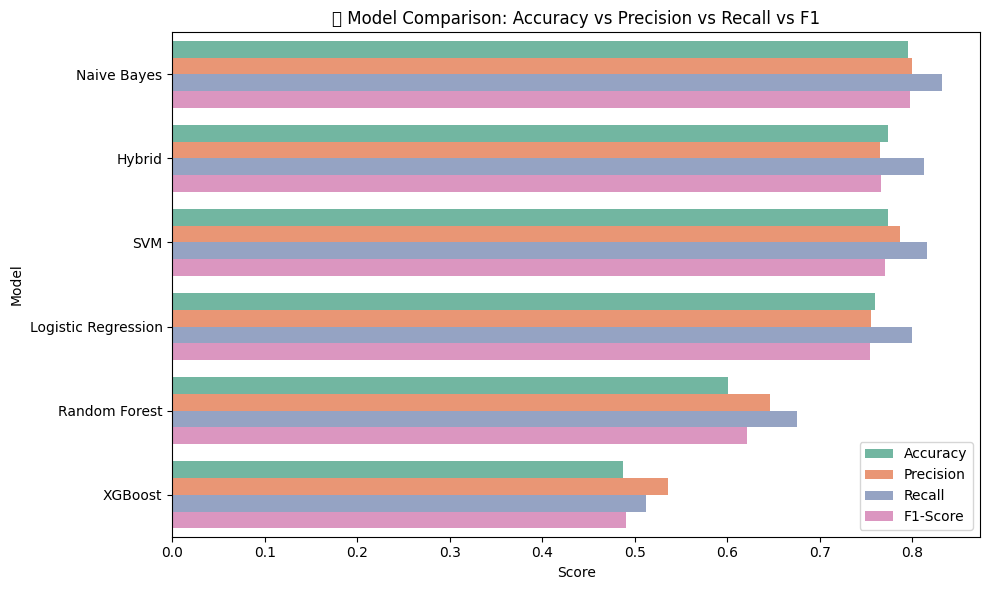

In [86]:
# 📊 Comparison of all metrics
comparison_df_long = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_long, x="Score", y="Model", hue="Metric", palette="Set2")
plt.title("📊 Model Comparison: Accuracy vs Precision vs Recall vs F1")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [22]:
for model_name, model_path in model_paths.items():
    model = joblib.load(model_path)
    y_pred = model.predict(X_test)
    report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    print(f"\n🔍 Per-Class Recall for {model_name}:")
    for cls in label_encoder.classes_:
        recall = report[cls]['recall']
        print(f"  {cls}: {recall:.2f}")



🔍 Per-Class Recall for SVM:
  Finance & Transaction Email: 0.99
  IT Alerts & System Notifications Email: 0.84
  Internal Policies & HR Updates Email: 1.00
  Legal & Contractual Email: 1.00
  Meeting & Schedule Email: 1.00
  Personal Email: 1.00
  Promotions or Marketing Email: 0.68
  Social Media Email: 0.90
  Spam Email: 1.00
  Utilities Bill Email: 0.49
  Work or Business Email: 0.80

🔍 Per-Class Recall for Logistic Regression:
  Finance & Transaction Email: 0.99
  IT Alerts & System Notifications Email: 0.84
  Internal Policies & HR Updates Email: 1.00
  Legal & Contractual Email: 1.00
  Meeting & Schedule Email: 1.00
  Personal Email: 1.00
  Promotions or Marketing Email: 0.70
  Social Media Email: 0.90
  Spam Email: 1.00
  Utilities Bill Email: 0.49
  Work or Business Email: 0.80

🔍 Per-Class Recall for Random Forest:
  Finance & Transaction Email: 0.99
  IT Alerts & System Notifications Email: 0.84
  Internal Policies & HR Updates Email: 1.00
  Legal & Contractual Email: 1.00
 

# Additional - Real Email


🚀 Evaluating: SVM
✅ Accuracy: 0.4481
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.56      0.32      0.41       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.02         1
                        Personal Email       0.01      0.20      0.02         5
         Promotions or Marketing Email       0.97      0.46      0.62      1282
                    Social Media Email       0.42      0.69      0.52       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.32      0.16      0.21       292

                             micro avg       0.48      0.45      0.47      2294
                             macro avg       0.25      0.32      0.20      2294


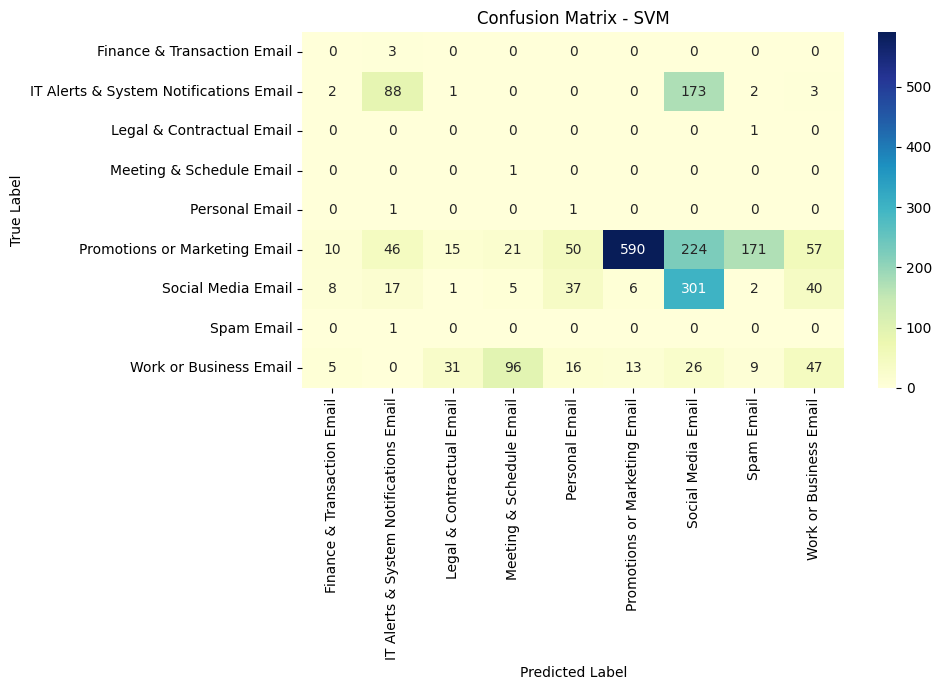


🚀 Evaluating: Logistic Regression
✅ Accuracy: 0.4651
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.55      0.32      0.41       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.01         1
                        Personal Email       0.01      0.20      0.02         5
         Promotions or Marketing Email       0.98      0.49      0.66      1282
                    Social Media Email       0.41      0.69      0.51       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.33      0.16      0.22       292

                             micro avg       0.51      0.47      0.49      2294
                             macro avg       0.25      0.32     

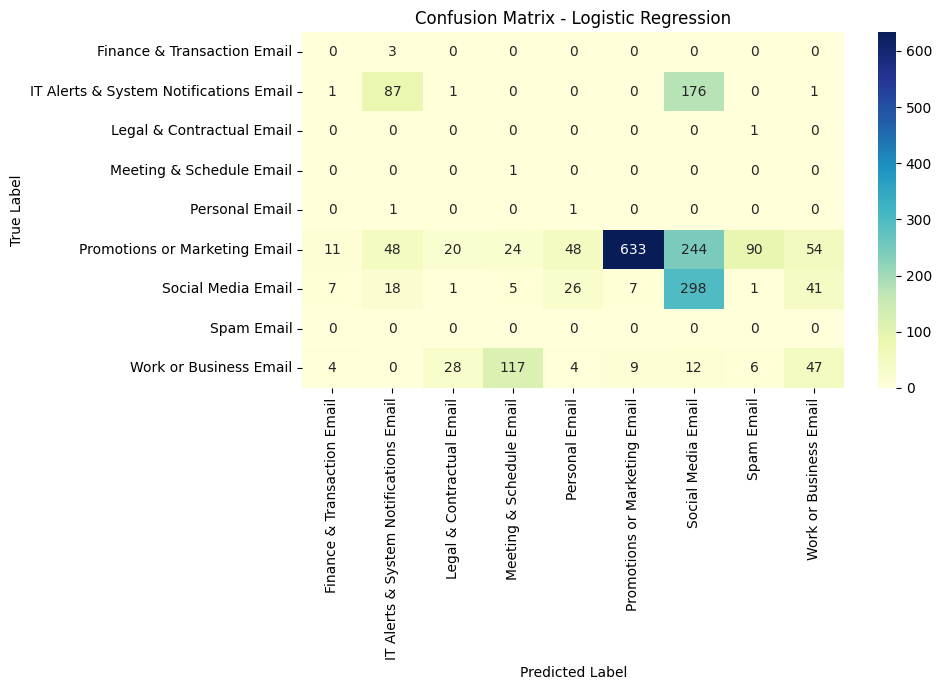


🚀 Evaluating: Random Forest
✅ Accuracy: 0.1796
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.09      0.31      0.14       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.02      1.00      0.04         1
                        Personal Email       0.00      0.20      0.01         5
         Promotions or Marketing Email       0.99      0.14      0.25      1282
                    Social Media Email       0.23      0.32      0.27       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.05      0.00      0.01       292

                             micro avg       0.19      0.18      0.19      2294
                             macro avg       0.15      0.22      0.08 

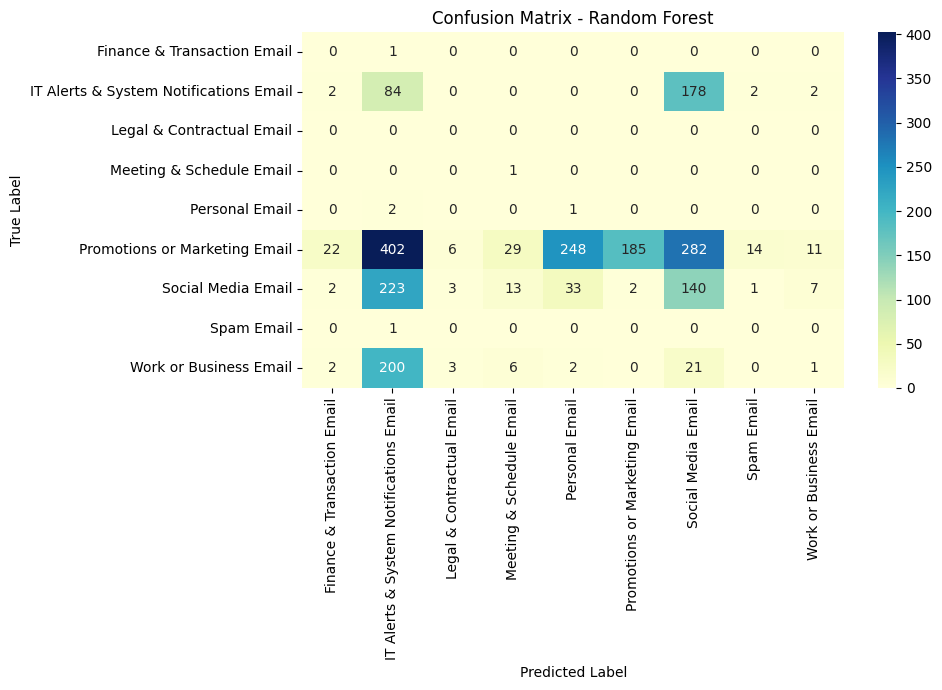


🚀 Evaluating: XGBoost
✅ Accuracy: 0.1665
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.11      0.17      0.13         6
IT Alerts & System Notifications Email       0.13      0.21      0.16       272
             Legal & Contractual Email       0.00      1.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.02         1
                        Personal Email       0.02      0.40      0.04         5
         Promotions or Marketing Email       0.97      0.14      0.25      1282
                    Social Media Email       0.15      0.31      0.20       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.05      0.00      0.01       292

                             micro avg       0.17      0.17      0.17      2294
                             macro avg       0.16      0.36      0.09      2

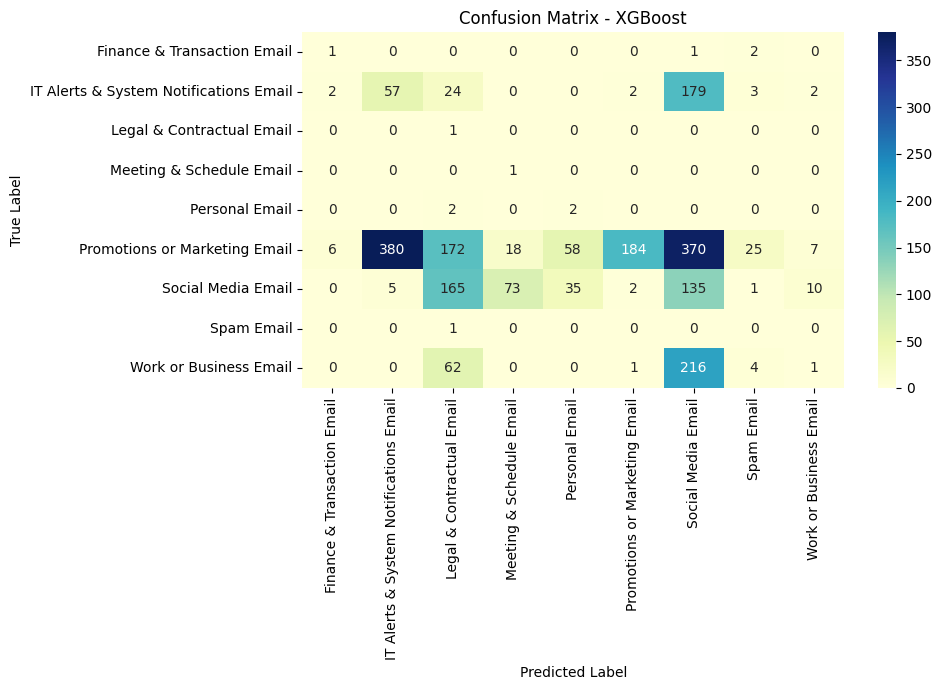


🚀 Evaluating: Naive Bayes
✅ Accuracy: 0.5632
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.60      0.32      0.41       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.03         1
                        Personal Email       0.02      0.20      0.03         5
         Promotions or Marketing Email       0.96      0.63      0.76      1282
                    Social Media Email       0.47      0.55      0.51       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.44      0.54      0.48       292

                             micro avg       0.60      0.56      0.58      2294
                             macro avg       0.28      0.36      0.25   

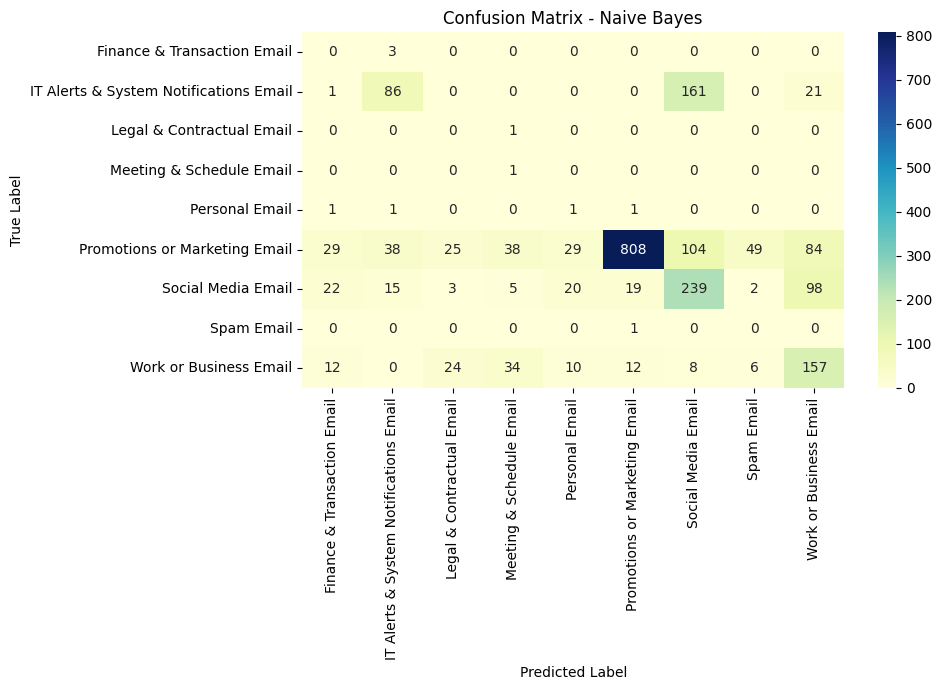


🚀 Evaluating: Hybrid
✅ Accuracy: 0.4804
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.53      0.33      0.40       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.01      1.00      0.01         1
                        Personal Email       0.01      0.20      0.02         5
         Promotions or Marketing Email       0.97      0.52      0.67      1282
                    Social Media Email       0.43      0.70      0.53       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.34      0.16      0.22       292

                             micro avg       0.52      0.48      0.50      2294
                             macro avg       0.25      0.32      0.21      22

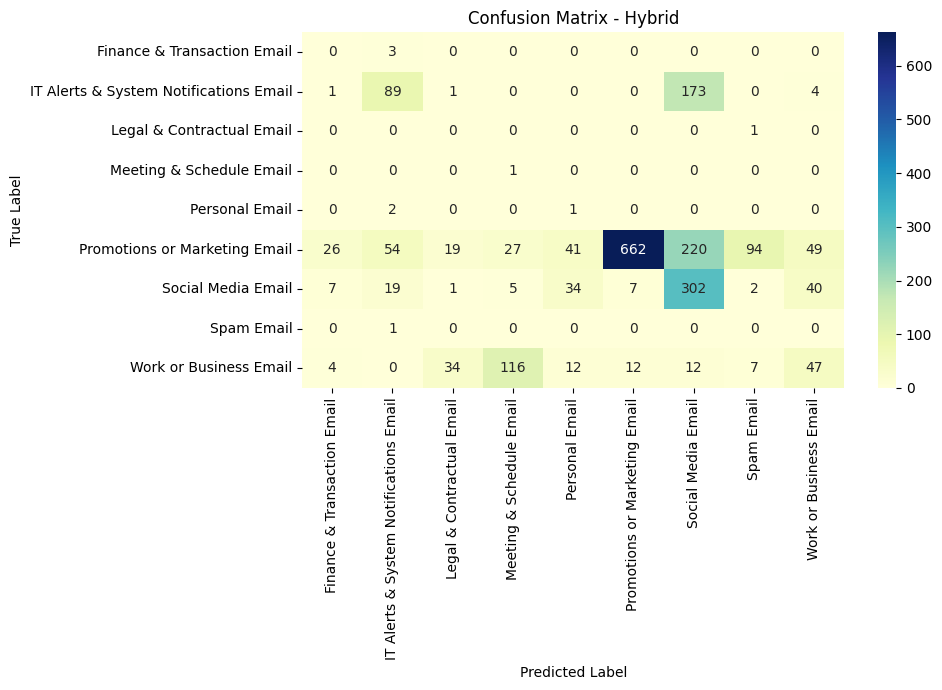


📊 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
4          Naive Bayes  0.563208   0.277155  0.359423  0.246477
5               Hybrid  0.480384   0.253645  0.322266  0.206757
1  Logistic Regression  0.465126   0.253982  0.317912  0.202962
0                  SVM  0.448126   0.254014  0.315362  0.200410
2        Random Forest  0.179599   0.153144  0.219904  0.079151
3              XGBoost  0.166521   0.160857  0.359360  0.090889


C:\Users\User\AppData\Local\Temp\ipykernel_17704\3349640203.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_17704\3349640203.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


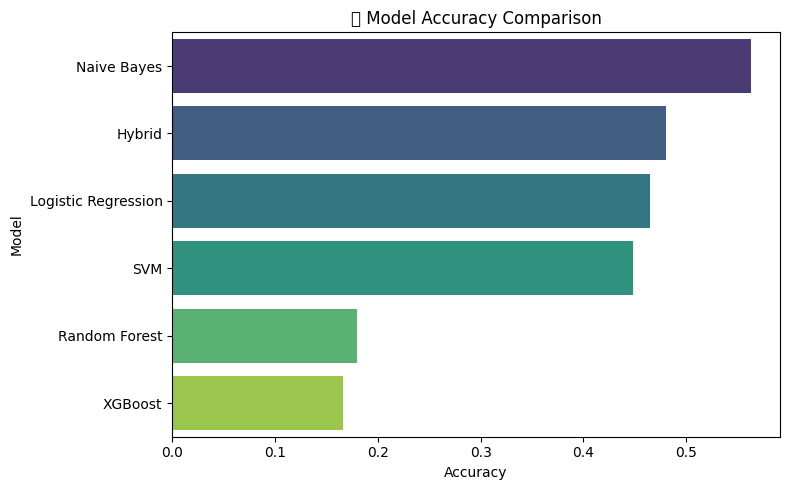

In [23]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/emails_202504202357.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load shared vectorizer and label encoder ===
vectorizer_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/tfidf_vectorizer.joblib"
encoder_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/label_encoder.joblib"

vectorizer = joblib.load(vectorizer_path)
label_encoder = joblib.load(encoder_path)

# === Step 3: Preprocess ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test = vectorizer.transform(df_test['Combined_Text'])

# Encode true labels if column exists
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 4: Define All Model Paths ===
model_paths = {
    "SVM": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/svm_model.joblib",
    "Logistic Regression": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/logistic_regression_model.joblib",
    "Random Forest": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/random_forest_model.joblib",
    "XGBoost": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/xgboost_model.joblib",
    "Naive Bayes": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/naive_bayes_model.joblib",
    "Hybrid": r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Model Result/hybrid_model.joblib"
}

# === Step 5: Evaluate All Models ===
comparison_results = []

for model_name, model_path in model_paths.items():
    print(f"\n🚀 Evaluating: {model_name}")
    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    # ✅ Identify present classes in test set
    unique_labels = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_labels)

    # ✅ Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names, output_dict=True)

    # ✅ Append to summary
    comparison_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": report_dict["macro avg"]["precision"],
        "Recall": report_dict["macro avg"]["recall"],
        "F1-Score": report_dict["macro avg"]["f1-score"]
    })

    # ✅ Print report
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names))

    # ✅ Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

# === Step 6: Compare All Models ===
comparison_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)

print("\n📊 Model Comparison Summary:")
print(comparison_df)

# === Step 7: Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
plt.title("📈 Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()